# Hypothesis testing

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import scipy
from scipy import stats
from numpy import random
import seaborn as sns
from importlib import reload
from iminuit import Minuit

sys.path.append('../')
import AdvAppStatFunctions as aas

# setting for plotting
import seaborn as sns
plt.style.use('seaborn-white')
sns.set_style('white', {'legend.frameon':True})
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
sns.set_palette("colorblind")
color = sns.color_palette("colorblind")

### Kats funktioner:

In [4]:
# From external function package
def likelihood_fit2(data, func, startparams, var_names):

    steps_taken = []
    
    def log_likelihood(pars): 
        f = np.log(func(data, *pars))
        steps_taken.append(pars)   # to plot minimizer steps
        return -np.sum(f)

    minuit_ullh = Minuit(log_likelihood, startparams, name=var_names)
    minuit_ullh.limits[var_names[0]] = (0,1)
    minuit_ullh.limits[var_names[1]] = (0,1)

    minuit_ullh.errordef = 0.5
    minuit_ullh.migrad()
    LLH_val = minuit_ullh.fval
    
    par = minuit_ullh.values[:]
    par_err = minuit_ullh.errors[:] 
    par_name = minuit_ullh.parameters[:]
    return par_name, par, par_err, steps_taken, LLH_val

def likelihood_fit3(data, func, startparams, var_names):

    steps_taken = []
    
    def log_likelihood(pars): 
        f = np.log(func(data, *pars))
        steps_taken.append(pars)   # to plot minimizer steps
        return -np.sum(f)

    minuit_ullh = Minuit(log_likelihood, startparams, name=var_names)
    minuit_ullh.limits[var_names[0]] = (0,1)
    minuit_ullh.limits[var_names[1]] = (0,1)
    minuit_ullh.limits[var_names[2]] = (0,1)
    
    minuit_ullh.errordef = 0.5
    minuit_ullh.migrad()
    LLH_val = minuit_ullh.fval
    
    par = minuit_ullh.values[:]
    par_err = minuit_ullh.errors[:] 
    par_name = minuit_ullh.parameters[:]
    return par_name, par, par_err, steps_taken, LLH_val

# Exercise 1
From the files posted on the class webpage for this lecture, use the lnlikelihood ratio and calculate the p-value of each data set for -1 ≤ x ≤ 1:
- The null hypothesis is the PDF from $f_0 (x\mid \rho, \omega) = 1+\rho x + \omega x^2$
- The alternative hypothesis is$f_A (x\mid \rho, \omega, \gamma) = 1+\rho x + \omega x^2- \gamma x^5$
- Each of the two competing models, the null model and the alternative model, is separately fitted to the data and the log-likelihood recorded. The test statistic (often denoted by D) is twice the log of the likelihoods ratio, i.e., it is twice the difference in the log-likelihoods:

$$-2 ln (\frac{L_{null}}{L_{hyp}}) = -2 \cdot (ln(L_{null}) - ln(L_{hyp}))$$

The model with more parameters (here alternative) will always fit at least as well — i.e., have the same or greater log-likelihood — than the model with fewer parameters (here null). Whether the fit is significantly better and should thus be preferred is determined by deriving how likely (p-value) it is to observe such a difference D by chance alone, if the model with fewer parameters were true. Where the null hypothesis represents a special case of the alternative hypothesis, the probability distribution of the test statistic is approximately a chi-squared distribution with degrees of freedom equal to $df_{alt} - df_{null}$ respectively the number of free parameters of models alternative and null.

### Parsing data

In [9]:
df1 = np.loadtxt('LLH_Ratio_2_data.txt')[:,0]    # Data set 1
df2 = np.loadtxt('LLH_Ratio_2a_data.txt')[:,0]   # Data set 2

xmin, xmax = -1, 1

### Defining null hypothesis and alternative hypothesis

In [10]:
def null_hyp(x, rho, w):
    f0 = 1 + rho * x + w * x**2
    N = 2 * (w+3) / 3
    return f0 / N

def alt_hyp(x, rho, w, y):
    fA = 1 + rho * x + w * x**2 - y * x**5
    N = 2 * (w+3) / 3
    return fA / N

### Fitting the data with a negLLH-fit for both the null and alternative hypothesis

In [47]:
# Doing LLH-fit for null_hyp and alt_hyp for each data set
par_n_names, par_a_names = ['rho', 'omega'], ['rho', 'omega','gamma']
par_n_start, par_a_start = [0.5,0.5], [0.5,0.5,0.5]


# Data set 1
par_n1, par_err_n1, negLLH_val_n1 = aas.llh_fit(df1, null_hyp, par_n_start, par_n_names)
par_a1, par_err_a1, negLLH_val_a1 = aas.llh_fit(df1, alt_hyp, par_a_start, par_a_names)

# Data set 2
par_n2, par_err_n2, negLLH_val_n2 = aas.llh_fit(df2, null_hyp, par_n_start, par_n_names)
par_a2, par_err_a2, negLLH_val_a2 = aas.llh_fit(df2, alt_hyp, par_a_start, par_a_names)

### Plotting the result and printing the best fit values

Dataset 1: Best fit for null hyp: 
           rho = 0.2990464199861426 
           omega = 0.6611888779172105 
           Best fit for alt hyp: 
           rho = 0.32385829149603806 
           omega = 0.6567447251162812 
           gamma = 0.06432922554725366 
 
Dataset 2: Best fit for null hyp: 
           rho = -0.04280798019465782 
           omega = 0.5796277377392839 
           Best fit for alt hyp: 
           rho = 0.3178286320242264 
           omega = 0.5875537217027185 
           gamma = 0.9214321458116762 
 


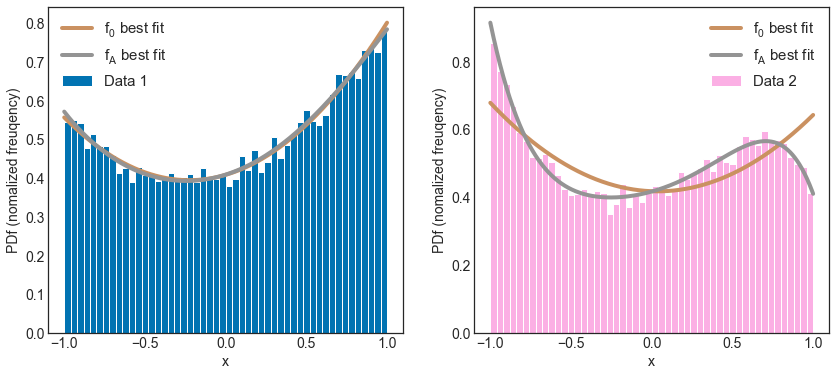

In [45]:
xarr = np.linspace(xmin,xmax,1000)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

#plot_hist(X, xmin, xmax, N_bins, ax, xlabel='x', histlabel='Histogram', d_xy = [0.80, 0.20], color= 'lightskyblue'):
#    hist = ax.hist(X, bins=N_bins, range=(xmin, xmax), color=color, label=histlabel, density = True)
    
aas.plot_hist(df1, xmin, xmax, 50, ax[0],  xlabel='x', histlabel = 'Data 1', color=color[0]) # r'$f_0$ best fit')
ax[0].plot(xarr, null_hyp(xarr, par_n1[0], par_n1[1]), color = color[5], label = r'$f_0$ best fit')
ax[0].plot(xarr, alt_hyp(xarr, par_a1[0], par_a1[1], par_a1[2]), color = color[7], label = r'$f_A$ best fit')
ax[0].legend(fontsize=15)


aas.plot_hist(df2, xmin, xmax, 50, ax[1], xlabel='x', histlabel = 'Data 2', color=color[6])
ax[1].plot(xarr, null_hyp(xarr, par_n2[0], par_n2[1]), color = color[5], label = r'$f_0$ best fit')
ax[1].plot(xarr, alt_hyp(xarr, par_a2[0], par_a2[1], par2_alt[2]),color = color[7], label = r'$f_A$ best fit')
ax[1].legend(fontsize=15);

print(f'Dataset 1: Best fit for null hyp: \n \
          {par_n_names[0]} = {par_n1[0]} \n \
          {par_n_names[1]} = {par_n1[1]} \n \
          Best fit for alt hyp: \n \
          {par_a_names[0]} = {par_a1[0]} \n \
          {par_a_names[1]} = {par_a1[1]} \n \
          {par_a_names[2]} = {par_a1[2]} \n ')


print(f'Dataset 2: Best fit for null hyp: \n \
          {par_n_names[0]} = {par_n2[0]} \n \
          {par_n_names[1]} = {par_n2[1]} \n \
          Best fit for alt hyp: \n \
          {par_a_names[0]} = {par_a2[0]} \n \
          {par_a_names[1]} = {par_a2[1]} \n \
          {par_a_names[2]} = {par_a2[2]} \n ')
  

### Determining the test-statistic likelihood ratio

In [52]:
def likelihood_ratio(LLH_null, LLH_hyp):
    # Because our LLH are already negative, we do NOT include a minus here
    return 2 * (LLH_null - LLH_hyp)  

LLHr1 = likelihood_ratio(negLLH_val_n1, negLLH_val_a1)
LLHr2 = likelihood_ratio(negLLH_val_n2, negLLH_val_a2)

### Determining the p-values

Survival function (also defined as 1 - cdf) integrates from a given value (here the likelihood ratio) to infinity.

In [49]:
pval1 = stats.chi2.sf(LLHr1, 1)
pval2 = stats.chi2.sf(LLHr2, 1)

In [51]:
print(f'Dataset 1: \n \
        LLH f0 = {negLLH_val_n1} \n \
        LLH fA = {negLLH_val_a1} \n \
        LLH ratio = {LLHr1} \n \
        p-value: {pval1}')

print(f'Dataset 2: \n \
        LLH f0 = {negLLH_val_n2} \n \
        LLH fA = {negLLH_val_a2} \n \
        LLH ratio = {LLHr2} \n \
        p-value: {pval2} approx 0')

Dataset 1: 
         LLH f0 = 13432.139550369659 
         LLH fA = 13431.405414887737 
         LLH ratio = 1.468270963843679 
         p-value: 0.2256186948986355
Dataset 2: 
         LLH f0 = 13651.005538365565 
         LLH fA = 13495.017489946043 
         LLH ratio = 311.97609683904375 
         p-value: 8.104936872717406e-70 approx 0


The p-value for data set 1 is 0.23 meaning that the probability for the null hypothesis being true is 23%. This means that we cannot reject the null hypothesis. 

The p-value for data set 2 is approx 0 meaning that the probability for the null hypothesis being true is 0%. This means that we can reject the null hypothesis. 